In [90]:
import pandas as pd  
import numpy as np  

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedGroupKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
# from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer, KNNImputer 
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from imblearn.over_sampling import SMOTE 
from sklearn.feature_selection import SelectKBest, chi2 
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import make_pipeline 


from catboost import CatBoostClassifier 

import matplotlib.pyplot as plt  
%matplotlib inline 
import seaborn as sns 



In [2]:
train= pd.read_csv("train.csv")
# df1= df1.reset_index(drop=True, inplace=True)
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


In [4]:
train.drop(columns=['employee_id'], axis=1, inplace=True)

In [5]:
for cats in train.columns:
    print(train[cats].value_counts())

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64
region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64
Bachelor's          36669
Master's & above    14925
B

In [6]:
test = pd.read_csv("test.csv")
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,61


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  awards_won?           23490 non-null  int64  
 11  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 2.2+ MB


In [8]:
test.drop(columns=['employee_id'], axis=1, inplace=True)

In [9]:
train['is_promoted'].value_counts(normalize=True)*100

0    91.482995
1     8.517005
Name: is_promoted, dtype: float64

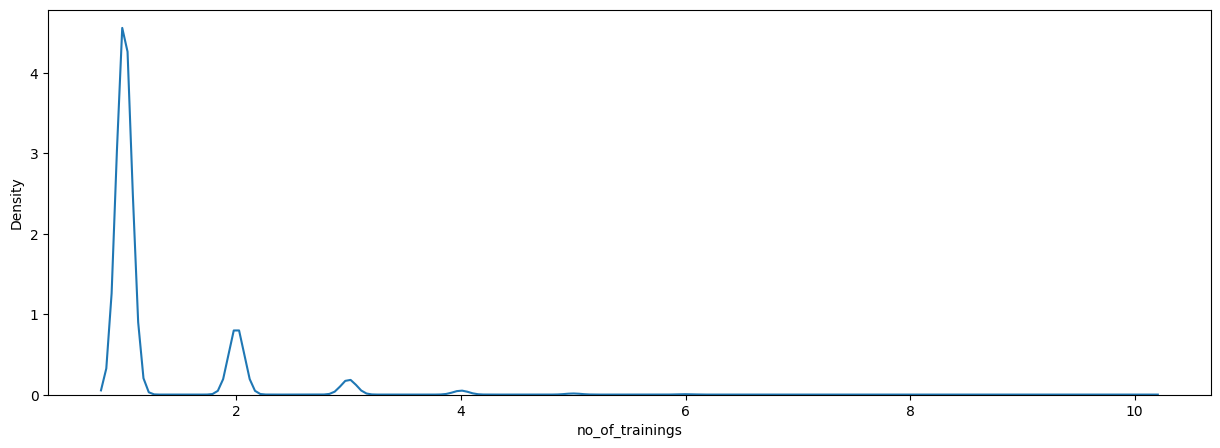

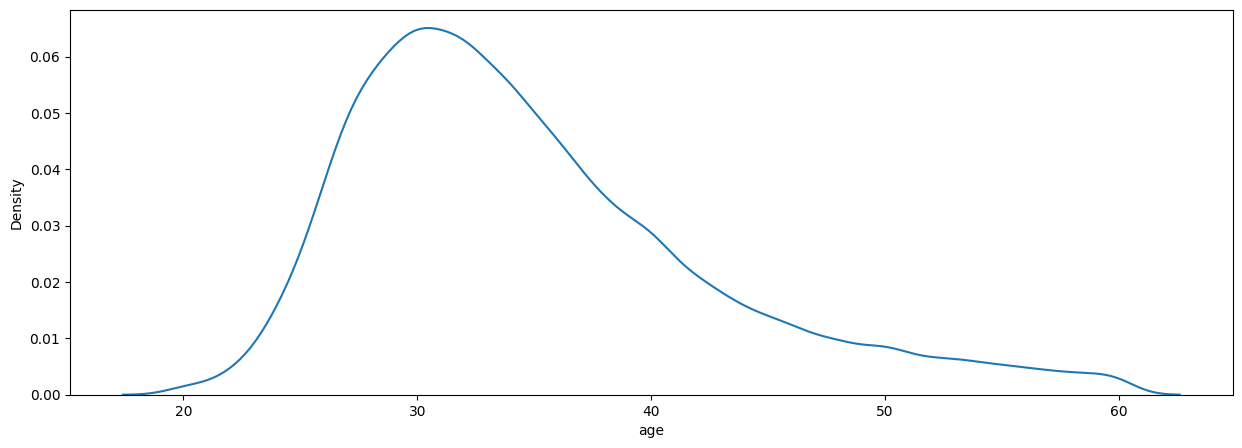

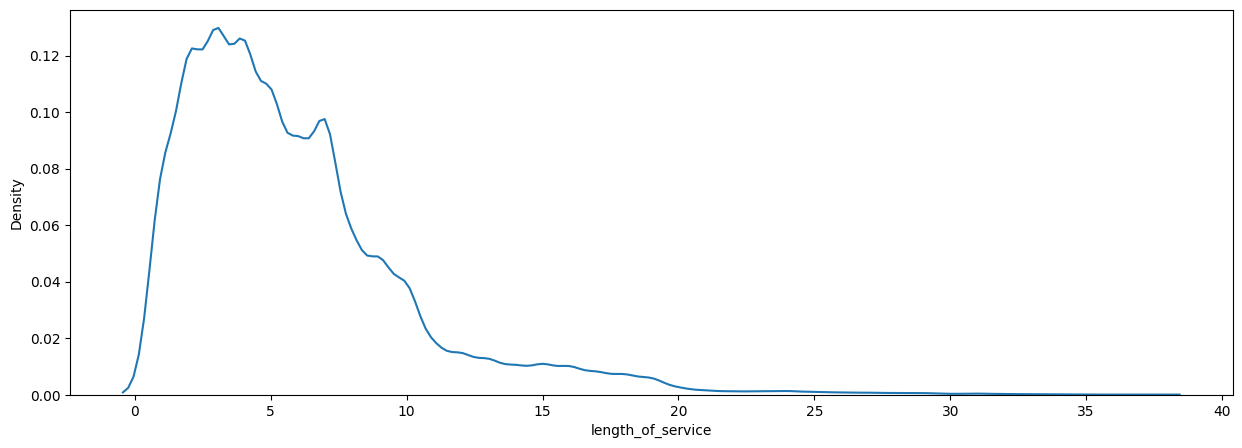

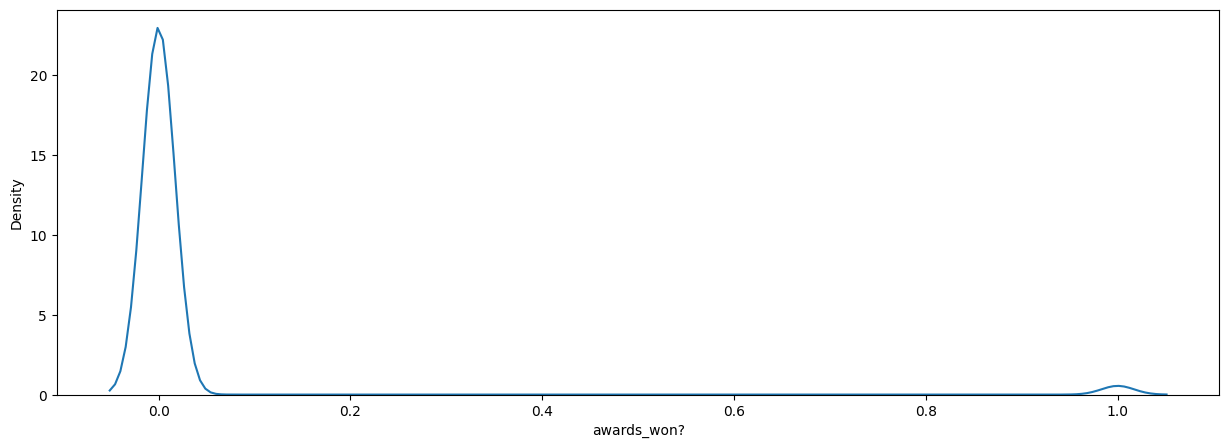

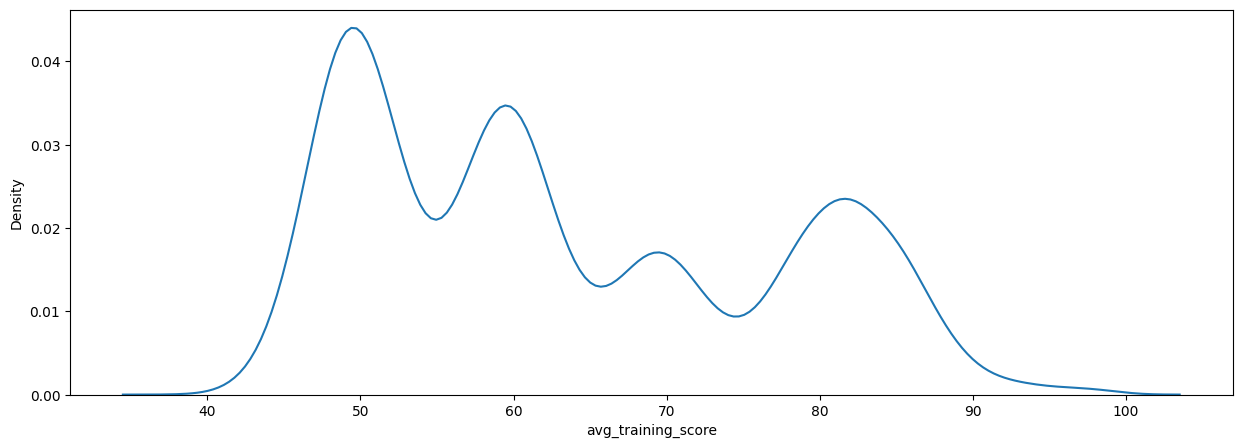

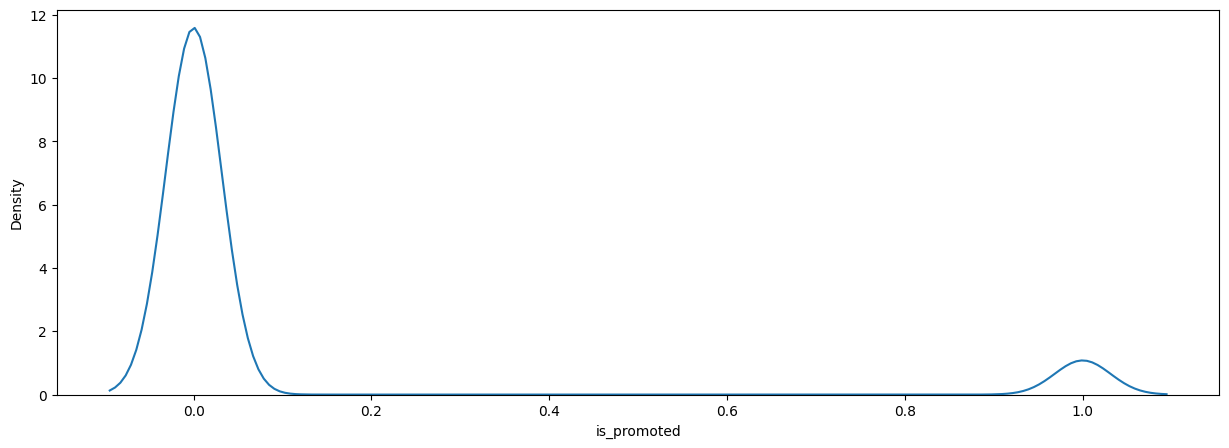

In [10]:
cols = train.select_dtypes("int64")
for items in cols:
    plt.figure(figsize=(15,5))
    sns.kdeplot(data=train, x=items)
    plt.show()

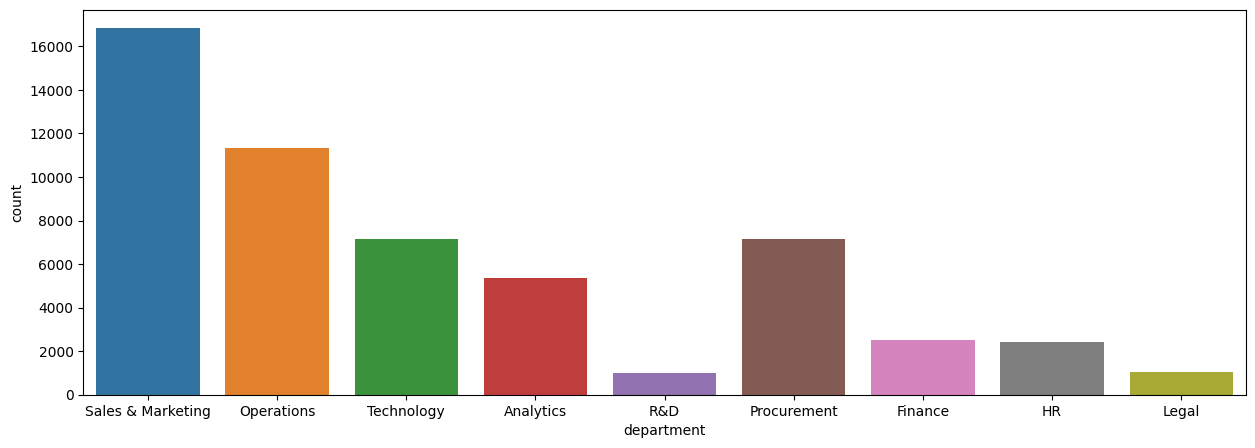

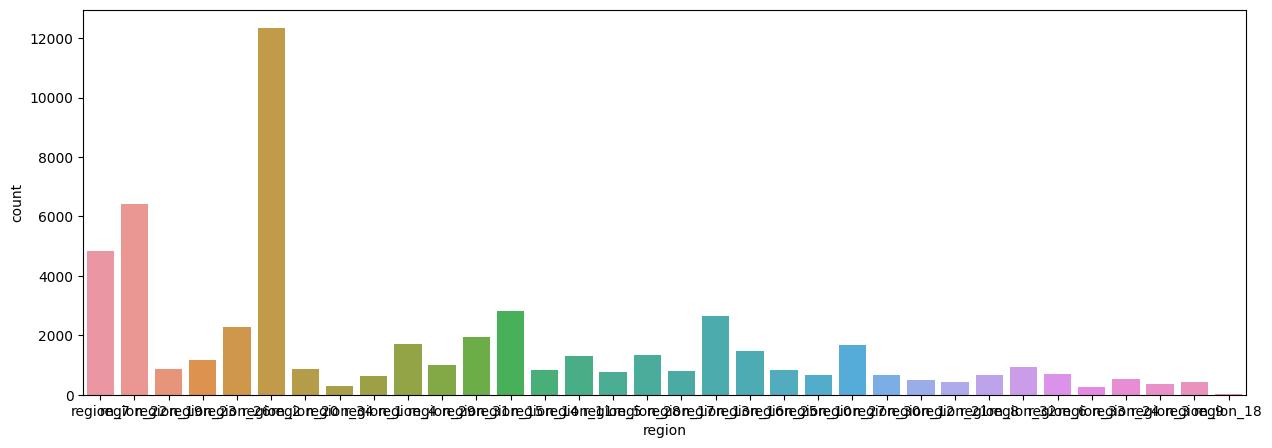

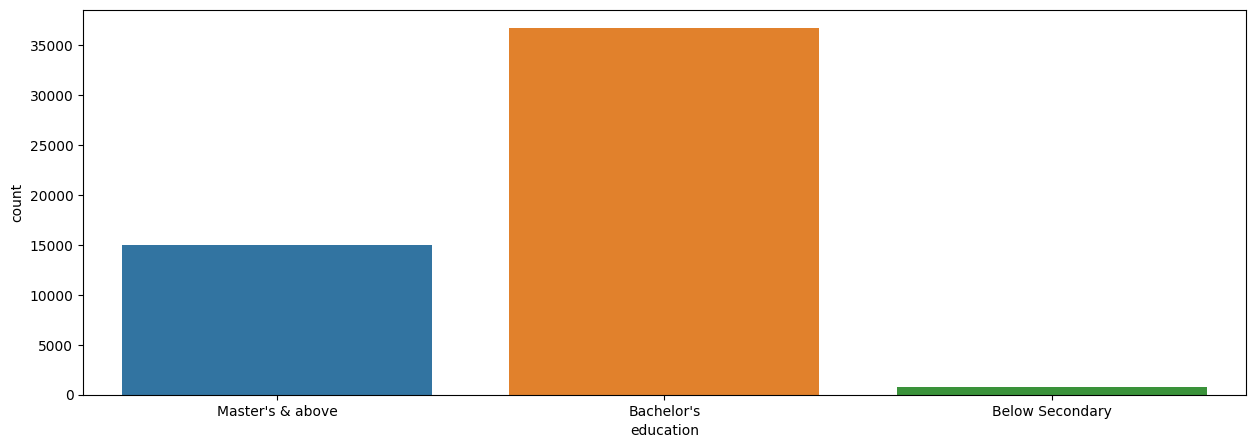

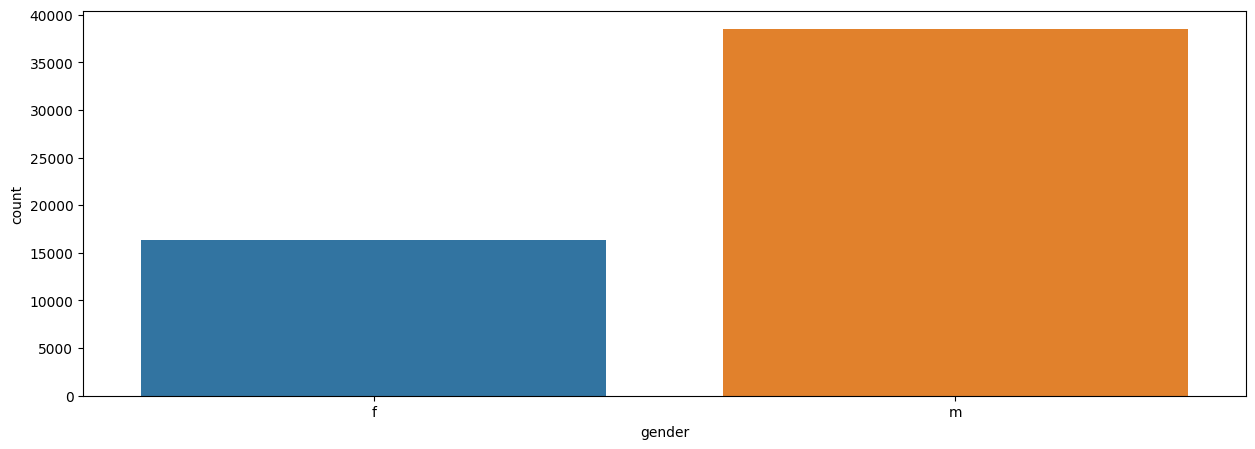

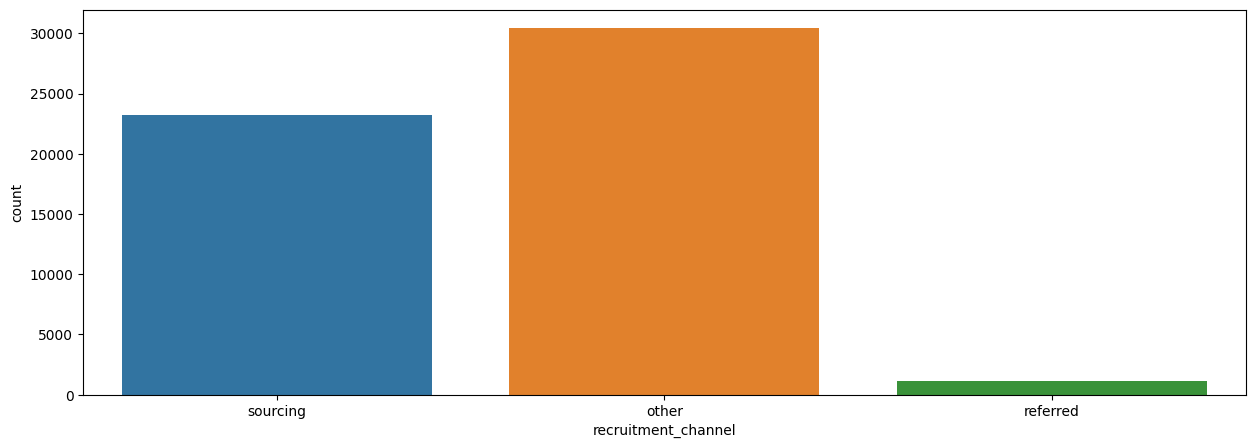

In [11]:
cols_2 = train.select_dtypes("object")
for items in cols_2:
    plt.figure(figsize=(15,5))
    sns.countplot(data=train, x=items)
    plt.show()

<ins><strong>Bivariate Analysis</ins></strong>
<p> Relationship between numerical columns and thetarget variable. </p>

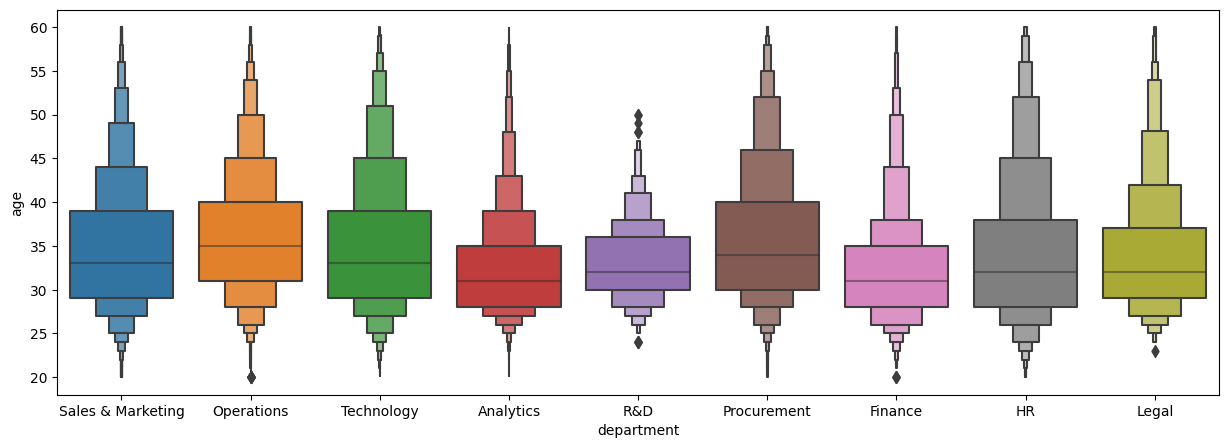

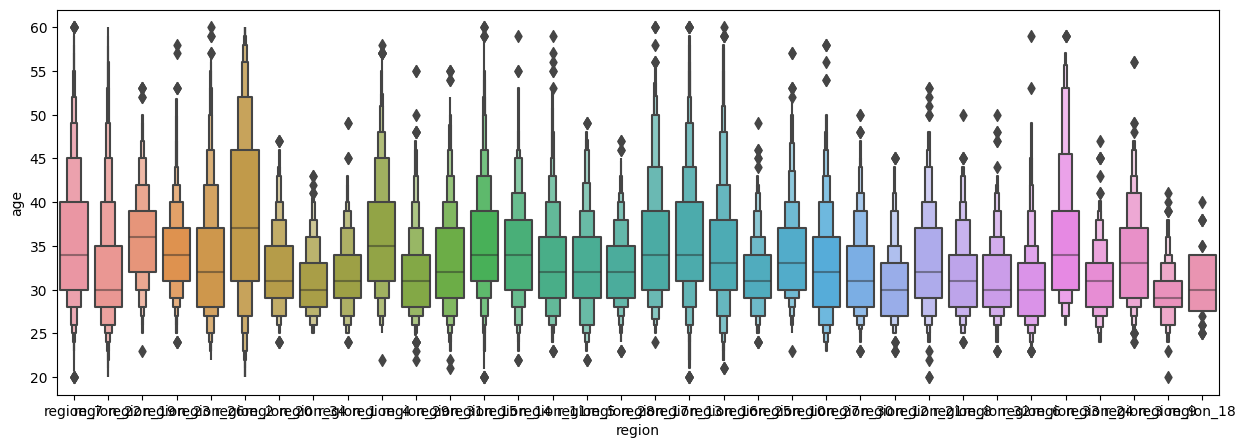

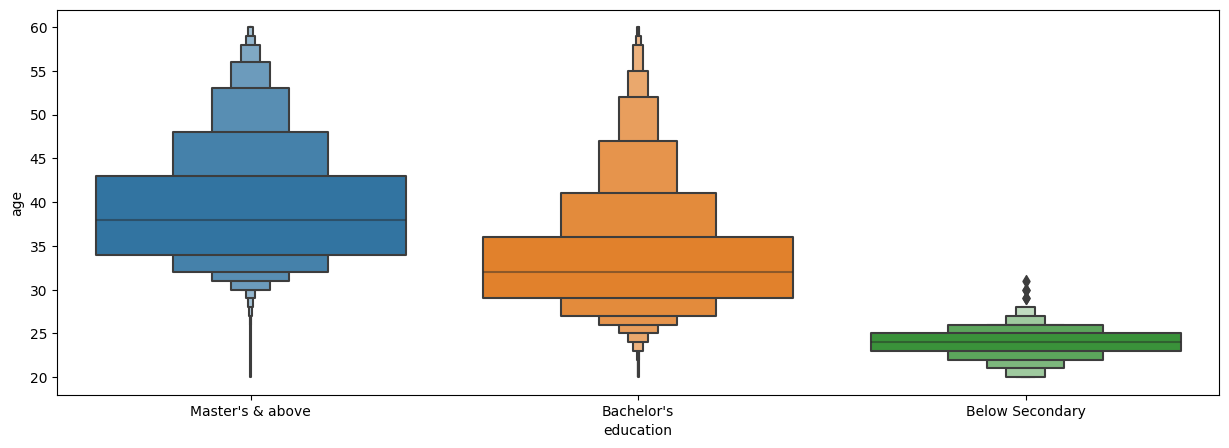

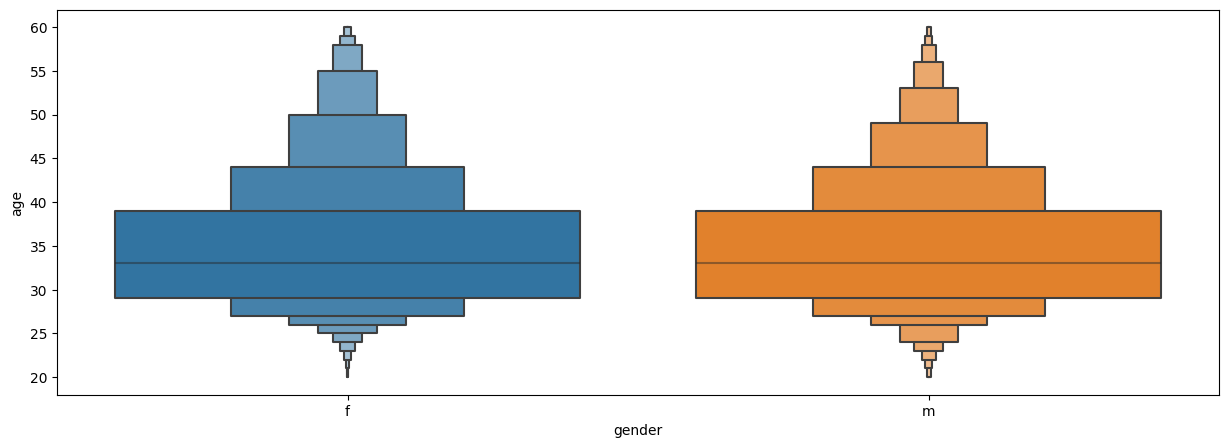

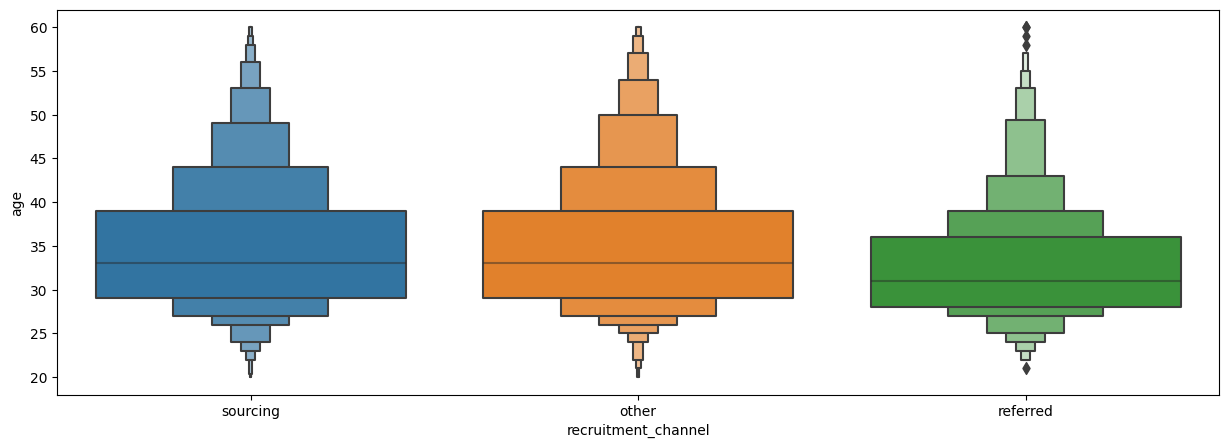

In [12]:

for items in cols_2:
    plt.figure(figsize=(15,5))
    sns.boxenplot(data=train, x=items, y='age')
    plt.show()

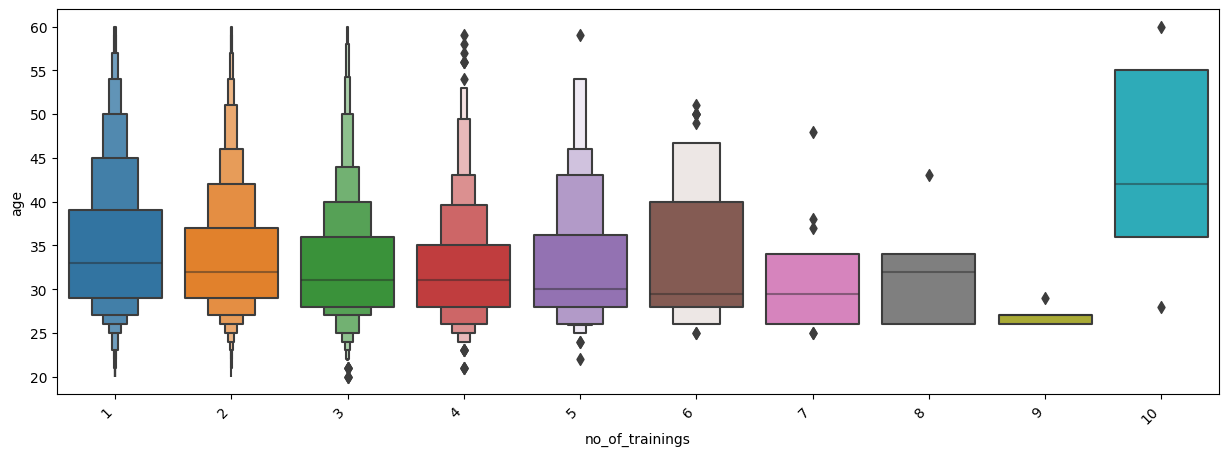

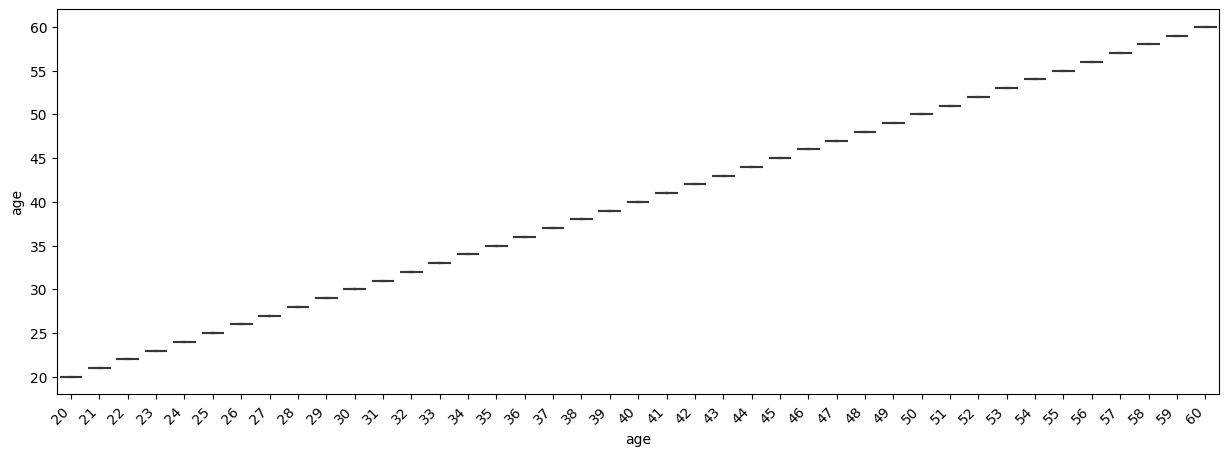

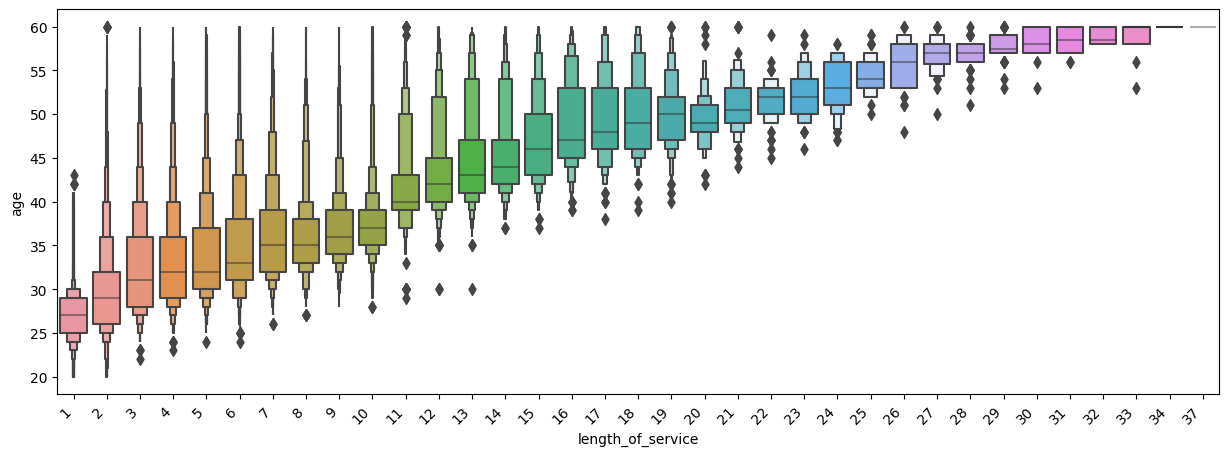

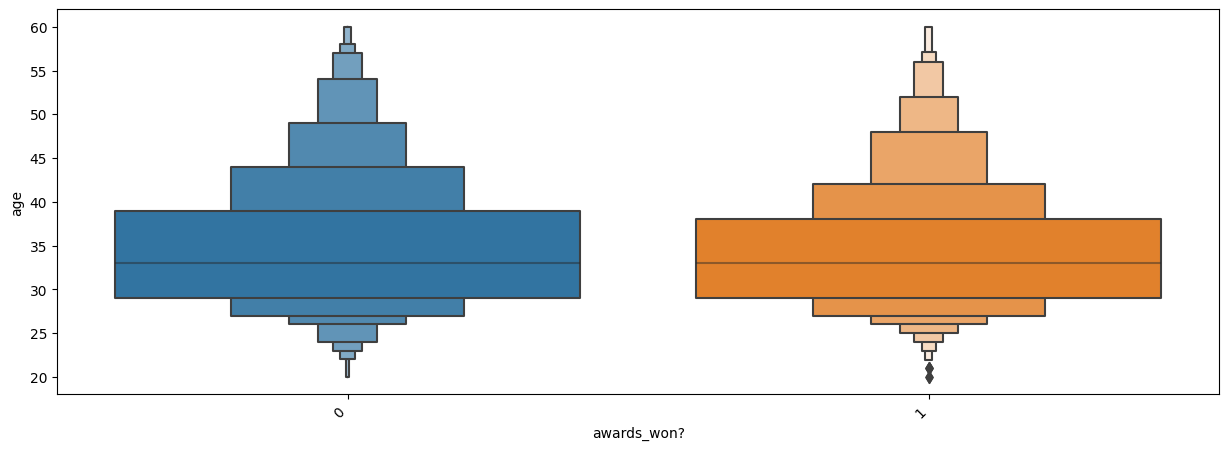

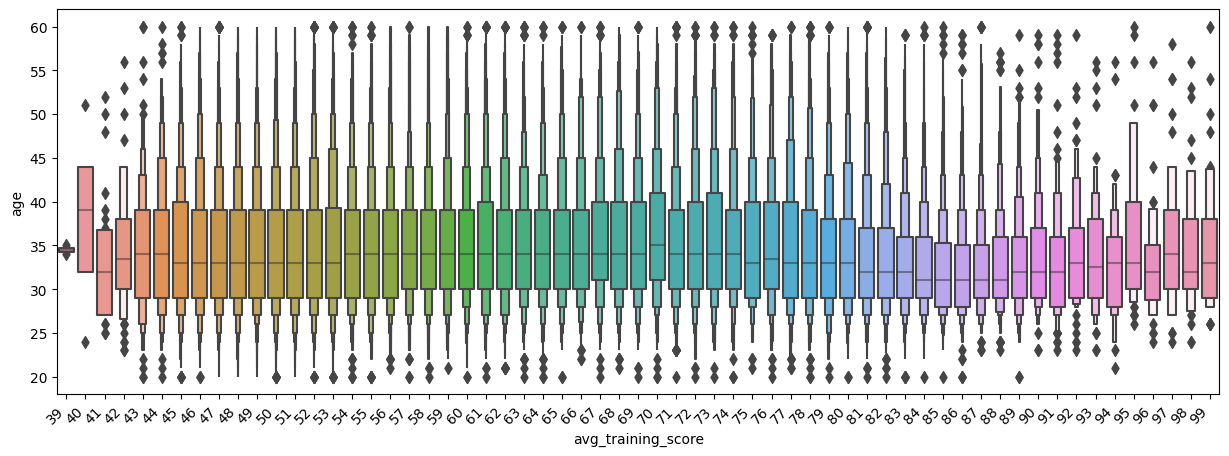

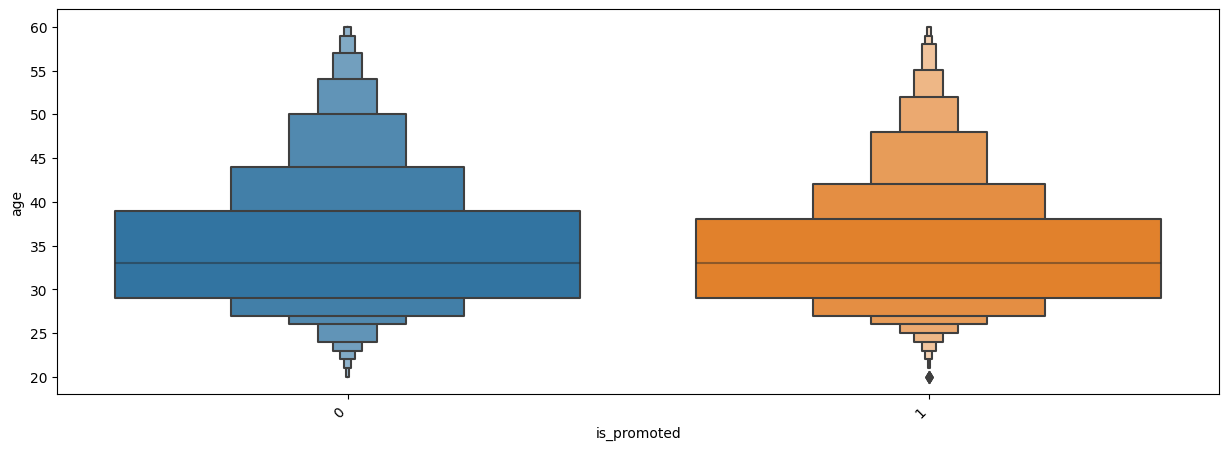

In [13]:

for items in cols:
    plt.figure(figsize=(15,5))
    ax=sns.boxenplot(data=train, x=items, y='age')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.show()

In [14]:
group_1 = train.groupby(['is_promoted','awards_won?'])['age'].aggregate(['mean','min','max'])
print(group_1)


                              mean  min  max
is_promoted awards_won?                     
0           0            34.852576   20   60
            1            34.250352   20   60
1           0            34.344123   20   60
            1            34.584973   20   60


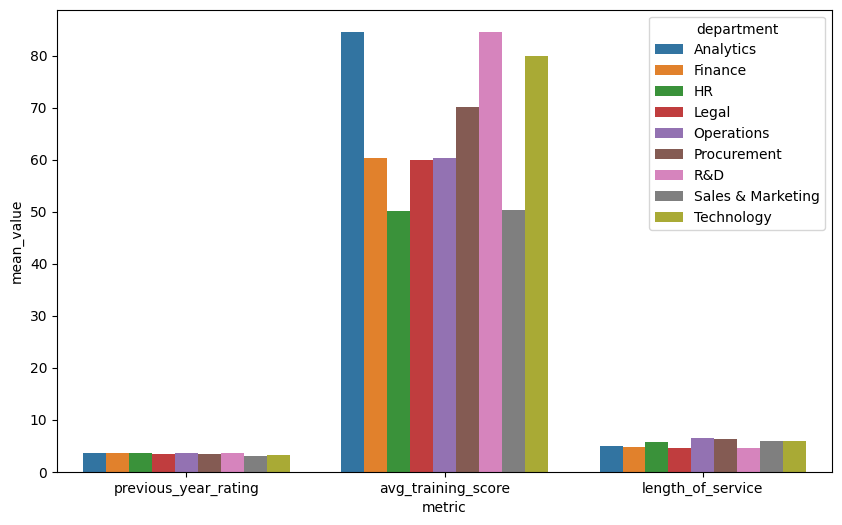

In [15]:
plt.figure(figsize=(10,6))
group_2 = train.groupby(['department']).aggregate({
    'previous_year_rating': ['mean'],
    'avg_training_score': ['mean'],
    'length_of_service': ['mean']
}).reset_index()
group_2_melted = pd.melt(group_2, id_vars=['department'], var_name='metric', value_name='mean_value')
ax = sns.barplot(data=group_2_melted, x='metric',y='mean_value', hue='department')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=20, horizontalalignment='right')
plt.show()

In [16]:
group_2

,department,previous_year_rating,avg_training_score,length_of_service
,,mean,mean,mean
0,Analytics,3.557307,84.602952,4.932735
1,Finance,3.506436,60.222003,4.819401
2,HR,3.482965,50.018197,5.683623
3,Legal,3.405281,59.868142,4.599615
4,Operations,3.632156,60.226648,6.416020
5,Procurement,3.298852,70.122443,6.331045
6,R&D,3.563596,84.596597,4.554555
7,Sales & Marketing,3.067937,50.261698,5.912292
8,Technology,3.158677,79.928692,5.914822


### <ins> Modelling </ins>

In [17]:

X_test = test 

X = train.drop(columns=['is_promoted'], axis=1)
y = train['is_promoted']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=40)

In [26]:
X_train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
10461,Sales & Marketing,region_7,Bachelor's,m,other,1,50,3.0,12,0,53
10474,Analytics,region_11,Bachelor's,m,other,1,30,3.0,2,0,91
10478,Operations,region_24,Bachelor's,f,other,1,32,3.0,3,0,59
10503,Sales & Marketing,region_2,Master's & above,m,referred,1,37,3.0,9,0,48
10507,Procurement,region_27,Bachelor's,f,other,1,28,3.0,4,1,80


In [95]:
# Impute missing values
pipe1 = ColumnTransformer(
    transformers=[
        ('impute_education', SimpleImputer(strategy="most_frequent", missing_values=np.nan),[2]),
        ('impute_year_rating', SimpleImputer(),[7])
], remainder="drop")

In [96]:
# Encode categorical columns
pipe2 = ColumnTransformer(
    transformers=[
    ('ohe_encode', OneHotEncoder(sparse=False,handle_unknown='ignore'),slice(0,5)),
    
], remainder='drop')

In [97]:
# #Handling class imbalances
# pipe2_5 = SMOTE(sampling_strategy="auto")


In [98]:
# Scale the values taking care of the positives and negatives using the MinmaxScaler
pipe3 = ColumnTransformer(
    transformers=[
    ('scale', MinMaxScaler(),slice(0,None))
])

In [99]:
# Feature selection
pipe4 = SelectKBest(score_func=chi2, k='all')


In [100]:
#Handling class imbalances
pipe2_5 = SMOTE(sampling_strategy="auto")


In [101]:
# Classifier model
pipe5 = CatBoostClassifier(
    auto_class_weights= 'Balanced'
    
    )
# pipe5 = DecisionTreeClassifier()

In [102]:


pipe = make_pipeline(pipe1,pipe2,pipe3,pipe4,pipe2_5,pipe5)

In [103]:
pipe.fit(X_train, y_train)

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Learning rate set to 0.067
0:	learn: 0.6867416	total: 35.6ms	remaining: 35.6s
1:	learn: 0.6813185	total: 67.6ms	remaining: 33.7s
2:	learn: 0.6764433	total: 97.5ms	remaining: 32.4s
3:	learn: 0.6723073	total: 129ms	remaining: 32s
4:	learn: 0.6687379	total: 159ms	remaining: 31.6s
5:	learn: 0.6657065	total: 248ms	remaining: 41.2s
6:	learn: 0.6630943	total: 317ms	remaining: 44.9s
7:	learn: 0.6608005	total: 397ms	remaining: 49.3s
8:	learn: 0.6588198	total: 450ms	remaining: 49.5s
9:	learn: 0.6571396	total: 504ms	remaining: 49.9s
10:	learn: 0.6556945	total: 550ms	remaining: 49.4s
11:	learn: 0.6544887	total: 605ms	remaining: 49.8s
12:	learn: 0.6533672	total: 652ms	remaining: 49.5s
13:	learn: 0.6524620	total: 689ms	remaining: 48.5s
14:	learn: 0.6516207	total: 713ms	remaining: 46.8s
15:	learn: 0.6508874	total: 740ms	remaining: 45.5s
16:	learn: 0.6502771	total: 760ms	remaining: 44s
17:	learn: 0.6497401	total: 782ms	remaining: 42.7s
18:	learn: 0.6492641	total: 809ms	remaining: 41.8s
19:	learn: 0.64

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(transformers=[('impute_education',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [2]),
                                                 ('impute_year_rating',
                                                  SimpleImputer(), [7])])),
                ('columntransformer-2',
                 ColumnTransformer(transformers=[('ohe_encode',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  slice(0, 5, None))])),
                ('columntransformer-3',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, None, None))])),
                ('selectkbest',
                 SelectKBest(k='all',
                             score_func=<function chi2 at 0x00000250D4FEE560>)),
                ('smote', SMOTE()),
                ('catboostclassifier',
                 <catboost.core.CatBoostClassifier object at 0x00000250E106F370>)])

In [104]:
y_preds = pipe.predict(X_val)

In [105]:
from sklearn.metrics import balanced_accuracy_score 

bal_acc = balanced_accuracy_score(y_val, y_preds)
print(bal_acc)

0.6103732888383617


In [106]:
acc = accuracy_score(y_val, y_preds)
acc

0.7614486407589856

In [107]:
#Test for overfitting on the train and test sets
score1 = pipe.score(X_train, y_train)
score2 = pipe.score(X_val, y_val)
print(score1)
print(score2)


0.7626009214067417
0.7614486407589856


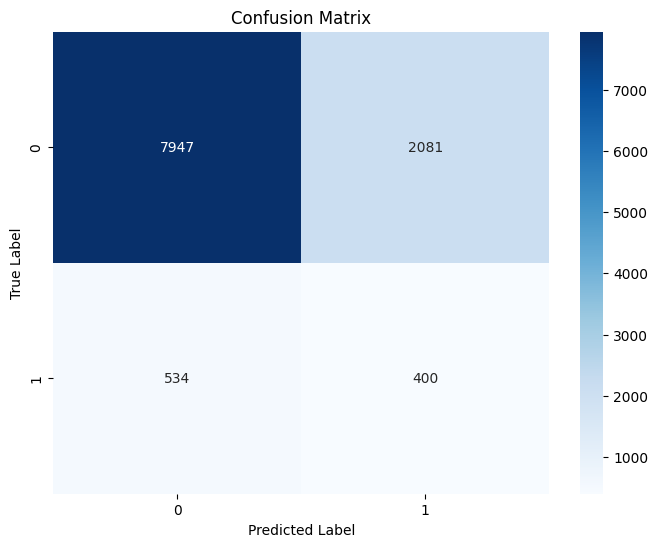

In [108]:
cm = confusion_matrix(y_val,y_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=pipe.classes_, yticklabels=pipe.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [109]:
cr = classification_report(y_val, y_preds)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.79      0.86     10028
           1       0.16      0.43      0.23       934

    accuracy                           0.76     10962
   macro avg       0.55      0.61      0.55     10962
weighted avg       0.87      0.76      0.81     10962



In [110]:
fpr, tpr, threshold = roc_curve(y_val, y_preds)

auc = auc(y_val, y_preds)

sns.lineplot(x=fpr, y=tpr)



TypeError: 'numpy.float64' object is not callable

In [111]:
# Calculate AUC (Area Under the Curve)
auc2 = roc_auc_score(y_val, y_preds)

# Print or use the AUC as needed
print(f'AUC: {auc2:.2f}')


AUC: 0.61


#### The catboost classifier performs relatively above average with an area under curve accuracy of about 62%. With more hyperparameter tuning, the model will perform even more better with a higher area under the curve.

#### Model Export

In [ ]:
import pickle 

pickle.dump(pipe, open('pipe.pkl', 'wb'))